# VISIONS-2 polarization analysis on low flyer

### Load basic VISIONS-2 data

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


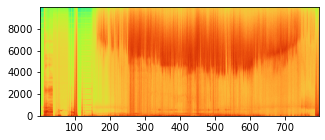

<IPython.core.display.Javascript object>

In [41]:
import sys 
sys.path.append('/Users/abrenema/Desktop/code/Aaron/github/mission_routines/rockets/visions2/')
sys.path.append('/Users/abrenema/Desktop/code/Aaron/github/plasma-physics-general/')
sys.path.append('/Users/abrenema/Desktop/code/Aaron/github/signal_analysis/')
import visions2_load_data
import v2  #plotting functions
import bandpass_data
import numpy as np 
import matplotlib.pyplot as plt


%load_ext nb_black
plt.rcParams['figure.figsize'] = [5, 2]


"""Enable auto module reloading"""
%load_ext autoreload
%autoreload 2

"""Load Langmuir Probe data"""
lp = visions2_load_data.load_langmuir()

"""Load magnetometer data"""
mag = visions2_load_data.load_mag()


"""Load E-field DC data (low-flyer only)"""
edc = visions2_load_data.load_efieldDC()


"""Load VLF data"""
vlfdata = visions2_load_data.load_vlf()
vlf12_lf = vlfdata["vlf12_lf"]
vlf34_lf = vlfdata["vlf34_lf"]

dvlf12_lf = vlf12_lf["dvlf12"]
times_vlf_lf = vlf12_lf["tvlf12"]
#interpolate VLF34 times to VLF12 times as they're slighly different
dvlf34_lf = np.interp(times_vlf_lf, vlf34_lf["tvlf34"], vlf34_lf["dvlf34"])




#sampling freq
sr_lf = [1/(times_vlf_lf[i+1]-times_vlf_lf[i]) for i in range(times_vlf_lf.size-1)]
fsVLF_lf = np.mean(sr_lf)
fsVLF = fsVLF_lf

"""Get spectral data - I only know how to do this by plotting, which is awkward"""
fig, axs = plt.subplots(1)
Sxx12, specfreqs, spectimes, im = axs.specgram(dvlf12_lf, Fs=fsVLF, NFFT=512, scale='dB', cmap='turbo')
Sxx34, specfreqs, spectimes, im = axs.specgram(dvlf34_lf, Fs=fsVLF, NFFT=512, scale='dB', cmap='turbo')
fcH_interp = np.interp(spectimes, mag["times"], mag["fcH"])
fcO_interp = np.interp(spectimes, mag["times"], mag["fcO"])





(0.0, 400.0)

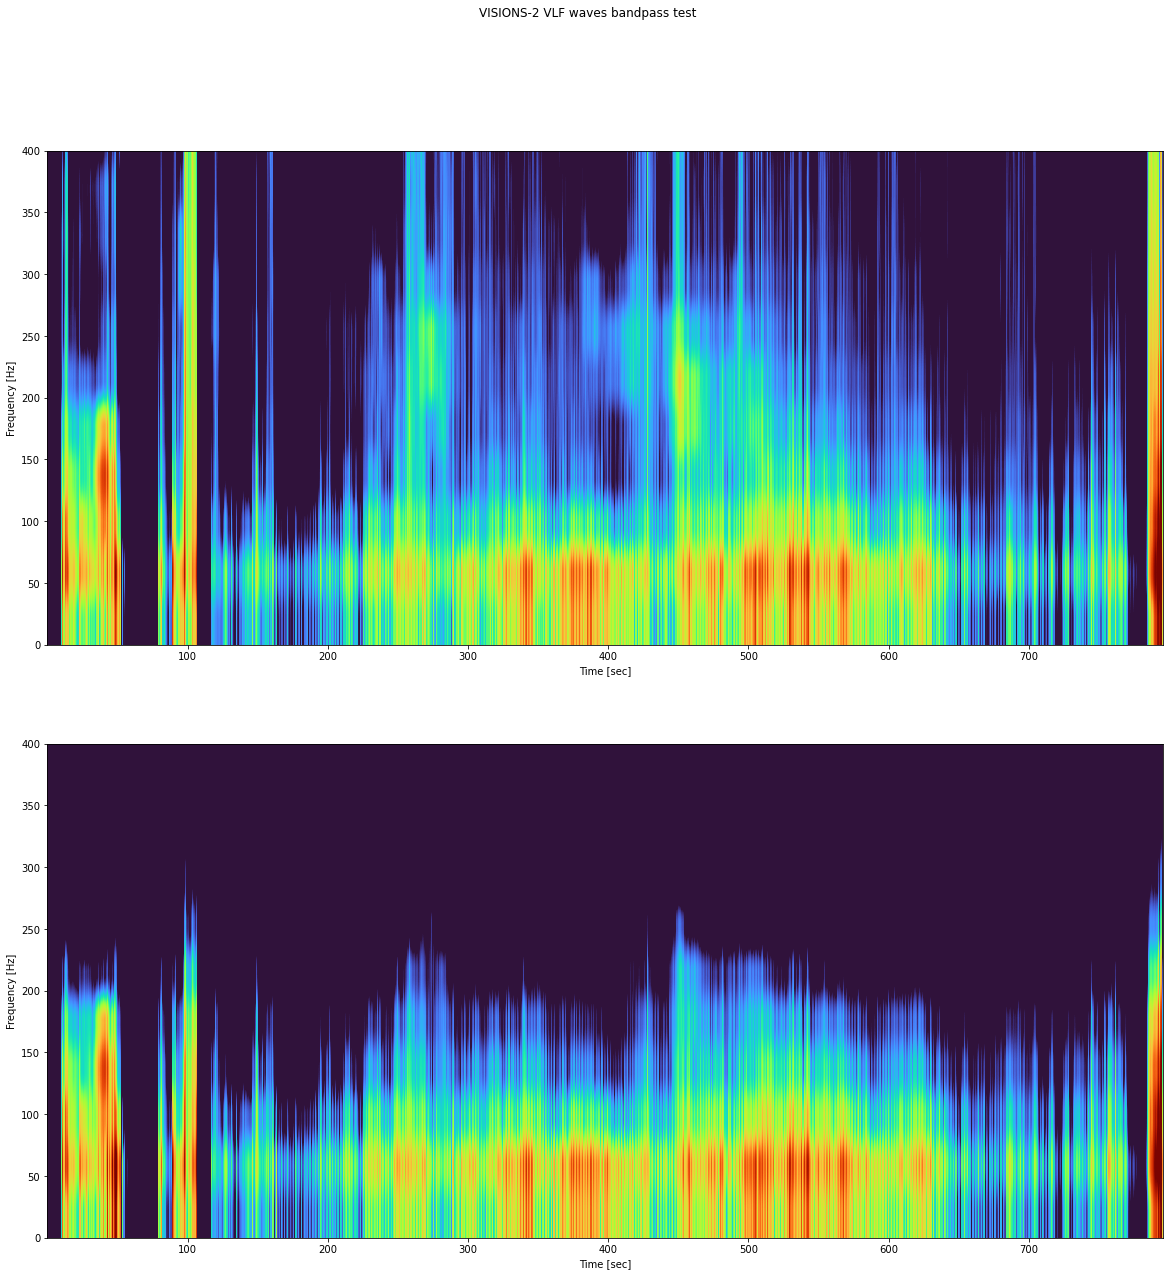

<IPython.core.display.Javascript object>

In [45]:
#Bandpass data to select power near O+ cyclotron frequency 

plt.rcParams['figure.figsize'] = [20, 20]


data = dvlf12_lf
lowcut = 10. 
highcut = 150. 

dvlf12_lf_filt = bandpass_data.butter_bandpass_filter(dvlf12_lf, lowcut, highcut, fsVLF, order=5)


fig, axs = plt.subplots(2)
fig.suptitle('VISIONS-2 VLF waves bandpass test')


p=0
Sxx12, specfreqs, spectimes, im = axs[p].specgram(dvlf12_lf, Fs=fsVLF, NFFT=512, scale='dB', cmap='turbo',vmin=-50,vmax=-10)
axs[p].set_ylabel('Frequency [Hz]')
axs[p].set_xlabel('Time [sec]')
axs[p].set_yscale('linear')
axs[p].set_ylim(0,400)

p=p+1
Sxx12_filt, specfreqs, spectimes, im = axs[p].specgram(dvlf12_lf_filt, Fs=fsVLF, NFFT=512, scale='dB', cmap='turbo',vmin=-50,vmax=-10)
axs[p].set_ylabel('Frequency [Hz]')
axs[p].set_xlabel('Time [sec]')
axs[p].set_yscale('linear')
axs[p].set_ylim(0,400)






#### Create integrated line plots from spectra

In [8]:


smootime = 10. #smooth time in sec

vlfAmp12_smoothed = v2.IntegrateSpectra(np.transpose(Sxx12), spectimes, specfreqs, 3000, 10000, smootime)
vlfAmp34_smoothed = v2.IntegrateSpectra(np.transpose(Sxx34), spectimes, specfreqs, 3000, 10000, smootime)
#eAmpPerp_smoothed = v2.IntegrateSpectra(elecPerp["flux"],elecPerp["times"],elecPerp["energies"],3,3000,smootime)
#eAmpPar_smoothed = v2.IntegrateSpectra(elecDowngoing["flux"],elecDowngoing["times"],elecDowngoing["energies"],3,3000,smootime)
#iAmpPerp_smoothed = v2.IntegrateSpectra(ionsPerp["flux"],ionsPerp["times"],ionsPerp["energies"],3,3000,smootime)
#iAmpPar_smoothed = v2.IntegrateSpectra(ionsDowngoing["flux"],ionsDowngoing["times"],ionsDowngoing["energies"],3,3000,smootime)
#eAmpLowE_smoothed = v2.IntegrateSpectra(elecLowE["flux"],elecLowE["times"],elecLowE["pitchangles"],-180,180,smootime)
#eAmpHigE_smoothed = v2.IntegrateSpectra(elecHigE["flux"],elecHigE["times"],elecHigE["pitchangles"],-180,180,smootime)
#iAmpLowE_smoothed = v2.IntegrateSpectra(ionsLowE["flux"],ionsLowE["times"],ionsLowE["pitchangles"],-180,180,smootime)
#iAmpHigE_smoothed = v2.IntegrateSpectra(ionsHigE["flux"],ionsHigE["times"],ionsHigE["pitchangles"],-180,180,smootime)


IndexError: index 41452 is out of bounds for axis 0 with size 41452

<IPython.core.display.Javascript object>

### Get lower hybrid and other important frequencies

In [ ]:

import plasma_params_get_flhr_freq

#Interpolate Langmuir probe density values to the time cadence of mag data. 
ne = np.interp(mag["times"], lp["lowflyer"]["times"], lp["lowflyer"]["ne"])

nH_ne = [0.] * np.size(mag["times"]) #fraction of H+
nO_ne = [1.] * np.size(mag["times"]) #fraction of O+


#First test applicability of high density limit. 
flhr_test = plasma_params_get_flhr_freq.flhr_HighDensityLimitTest(ne, mag["fce"], mag["fcH"])

#flhr in high density limit for pure H+ and O+ plasmas
flhr_highdens_H = plasma_params_get_flhr_freq.flhr_HighDensityLimit(mag["fce"], mag["fcH"])  #100% H+
flhr_highdens_O = plasma_params_get_flhr_freq.flhr_HighDensityLimit(mag["fce"], mag["fcO"])  #100% O+

#flhr w/o high density assumption
flhr_MassFrac = plasma_params_get_flhr_freq.flhr_IonMassFractions(ne, mag["fce"], nH_ne, nO_ne)

#Lower hybrid frequency (not in high density limit) for full H+ and full O+
flhr_H = plasma_params_get_flhr_freq.flhr_H(ne, mag["fce"], mag["fcH"])
flhr_O = plasma_params_get_flhr_freq.flhr_H(ne, mag["fce"], mag["fcO"])

flh_interp = np.interp(spectimes, mag["times"], flhr_MassFrac)

